In [ ]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

Se basa realizar el cálculo de una distribución teórica, cuyos parámetros se basan en la información o en el conjunto de datos con el que estamos trabajando. En el ejemplo en clase, primero se calcula un conjunto de datos aleatorios, que sigue a una distribución normal, cuya media será 50 y el desvío estandar será de 5. Esto se genera a partir de la siguiente línea de código:



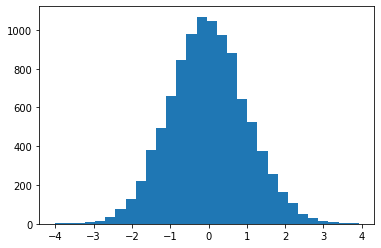

In [ ]:
sample = normal(size=10000) # generador aleatorio basado en la distribución normal
pyplot.hist(sample, bins=30) 
pyplot.show()

Si graficamos el resultado, veremos algo como lo expuesto en la siguiente imagen, la cual tiene una forma de distribución normal:

## Estimación paramétrica

La estimacion paramétrica consiste en suponer una función para la distribución y ajustar los parámetros de los datos a dicha distribución. Por otro lado, la estimación no paramétrica se aplica cuando los datos no se ajustan a ninguna distribución conocida.

El siguiente paso es calcular una función teórica que se ajuste al conjunto de datos. En este caso se conoce la media y el desvío porque los colocamos nosotros para realizar la simulación, pero en una situación real, se debe calcular la media y el desvío tal como lo hizo el profe, y esto se ve en la siguiente línea de código:

mu = sample.mean()
sigma = sample.std()

Con estos valores, se crea una instancia de un objeto cuyos parámetros son precisamente mu y sigma. Es decir, tenemos la base para aplicar la fórmula de la función de distribución Gauseana, pero nos fatan los valores sobre los cuales vamos a calcular esas probabilidades. Entonces primero se crea el objeto y luego se genera un array cuyo rango va a variar entre los extremos de los datos reales y calculamos las probabilidades. Todo esto se ejecuta en las siguientes líneas de código:

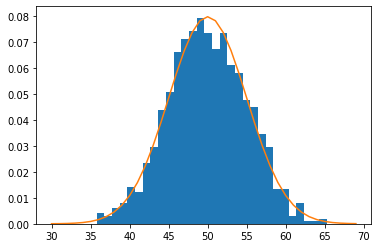

In [ ]:
sample = normal(loc=50, scale=5, size=1000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

# Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html


Este proceso se aplica cuando los datos no se ajustan a una distribución conocida. Entonces no forzamos ajustar los datos a una única distribución, sino a un conjunto de distribuciones.
En este ejemplo, el profe utiliza un método que ya viene incluído dentro de la librería de ScikitLearn, el cual se llama Kernel Density Estimation. Para ello, primero se simulan dos conjuntos de datos a través de dos funciones normales y se juntan en luego en una sola variable a través del método hstack(). Esto lo vemos en las siguientes líneas del código:

Luego, una vez que tenemos los datos simulados, comienza el proceso de estimación, para ello se crea un objeto modelo, el cual se instancia a través de los parámetros bandwidth (parámetro de suavizado) y kernel (funciones de distribución que se usan para la estimación). Esto es equivalente al método anterior, donde teníamos la función normal teórica, y luego calculábamos las probabilidades, solo que ahora no tenemos solo una función de densidad de probabilidad, sino un conjunto de distribuciones. Una vez creado el objeto, se ajustan los datos a las necesidades del objeto, para esto se utiliza el método reshape, el cual los ordena en una matriz de 1000 filas y 1 columna y luego se ajusta el modelo a estos datos. Esto se hace con las siguientes líneas de codigo:

Ahora, como dije antes, estamos ajustando el modelo a los datos, es como si estuvieramos calculando la media y el desvío estandar de una distribución normal pero nos faltan calcular los promodios para darle forma a la función teórica. Esto es lo que hacemos a continuación, se crea un array en el rango de los datos reales sobre cuales queremos estimar la función, y luego calculamos las probabilidades. Esto se hace en las siguientes líneas del código. Una aclaración, el cálculo de forma logarítimica tiene que ver con la complejidad algorítmica, es una cuestión de eficiencia. Luego a través de función inversa, la exponencial, obtenemos las probabilidades.

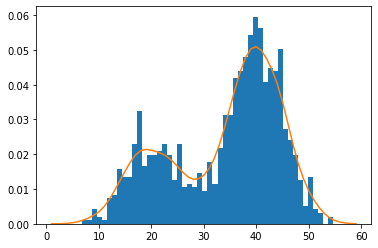

In [ ]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
#ponerlas dentro de una sola
sample = hstack((sample1, sample2))

#crear modelo
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad

pyplot.hist(sample, bins=50, density=True) 
pyplot.plot(values[:], probabilities)
pyplot.show()